# Loan Approval Prediction Model                       - Chesta Srivastava(20AG36007)
**The loan approval dataset** is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features. We will build & optimize a loan approval prediction system with advanced machine learning techniques, enhancing accuracy & identifying key factors

Signature of Professor -




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(6,8)})

In [6]:
df = pd.read_csv("../music/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Data Cleaning

In [7]:
df.drop('loan_id', axis = 1 , inplace = True)


In [8]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [10]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
df.columns = df.columns.str.replace(' ' , '')

In [12]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [13]:
cat_cols = ['no_of_dependents', 'education', 'self_employed', 'loan_status']

In [14]:
for col in cat_cols:
    print( df[col].value_counts())
    print("-" * 20)

4    752
3    727
0    712
2    708
1    697
5    673
Name: no_of_dependents, dtype: int64
--------------------
 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64
--------------------
 Yes    2150
 No     2119
Name: self_employed, dtype: int64
--------------------
 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64
--------------------


In [15]:
df['loan_status'].value_counts(normalize=True)

 Approved    0.62216
 Rejected    0.37784
Name: loan_status, dtype: float64

**Notice: Imbalanced Dataset Lables**

In [16]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [17]:
df.duplicated().sum()

0

## Feature Analysis

In [18]:
df.describe(include="number")

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [19]:
df[df.bank_asset_value > 14500000]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1633,0,Graduate,Yes,9800000,23200000,10,573,23900000,3300000,23600000,14600000,Approved
1674,1,Not Graduate,No,9800000,21300000,2,356,23000000,12300000,25700000,14600000,Rejected
1805,5,Not Graduate,No,9900000,33600000,20,580,7000000,10800000,37400000,14700000,Approved


In [20]:
# Select only numeric columns
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                          no_of_dependents  income_annum  loan_amount  \
no_of_dependents                  1.000000      0.007266    -0.003366   
income_annum                      0.007266      1.000000     0.927470   
loan_amount                      -0.003366      0.927470     1.000000   
loan_term                        -0.020111      0.011488     0.008437   
cibil_score                      -0.009998     -0.023034    -0.017035   
residential_assets_value          0.007376      0.636841     0.594596   
commercial_assets_value          -0.001531      0.640328     0.603188   
luxury_assets_value               0.002817      0.929145     0.860914   
bank_asset_value                  0.011163      0.851093     0.788122   

                          loan_term  cibil_score  residential_assets_value  \
no_of_dependents          -0.020111    -0.009998                  0.007376   
income_annum               0.011488    -0.023034                  0.636841   
loan_amount                0.008437

### Loan Status, Loan Amount, Annual Income

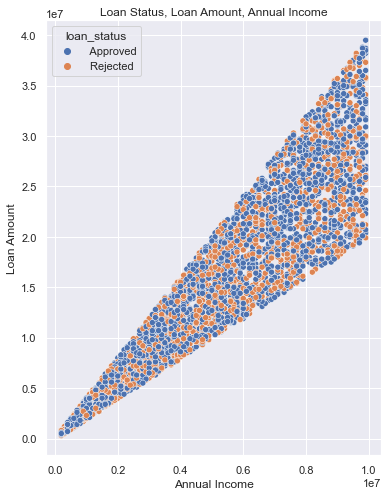

In [21]:
sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

**There is a positive correlation between annual income and loan amount.** However, this relationship does not appear to influence loan approval status significantly.

Applicants with lower incomes tend to request **smaller** loan amounts with less variability, while those with **higher** incomes seek a wider range of loan values. This pattern is likely due to lenders' risk assessment practices, which often **correlate** loan amounts with income to ensure repayment capacity. Consequently, higher-income applicants may have more flexibility in loan amounts.

Interestingly, the dataset shows that while some high-income applicants with large loan requests are approved (upper right quadrant), others with lower loan requests are rejected (middle right quadrant). This suggests that factors beyond income and loan amount, such as **credit score, employment history, or lender policies, influence approval decisions**. A more in-depth analysis using code can provide further insights into these variables.

### Loan Status, Loan Amount, luxury_assets_value

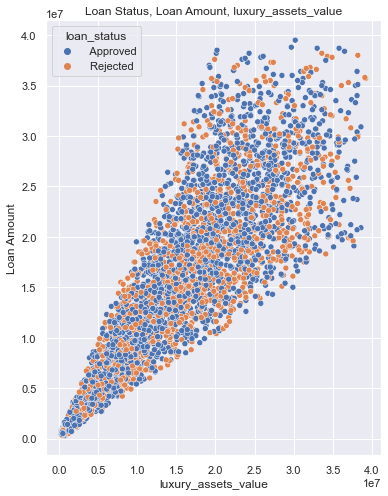

In [22]:
sns.scatterplot(x=df['luxury_assets_value'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, luxury_assets_value")
plt.xlabel("luxury_assets_value")
plt.ylabel("Loan Amount")
plt.show()

It seems that the middle area of luxury assets value share same loan amounts with the high luxuray assets value. This tells us that the luxuray assets share the effects with the other features on the loan approval decision

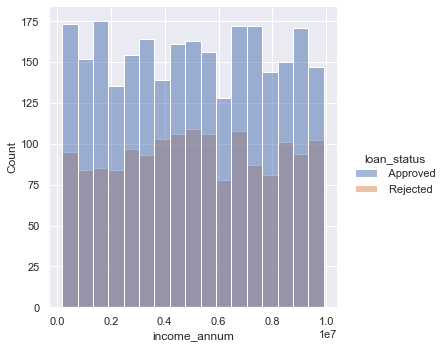

In [23]:
sns.displot(data = df , x ="income_annum",hue='loan_status')

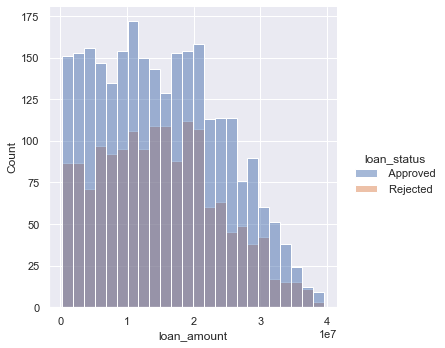

In [24]:
sns.displot(data = df , x ="loan_amount",hue='loan_status')

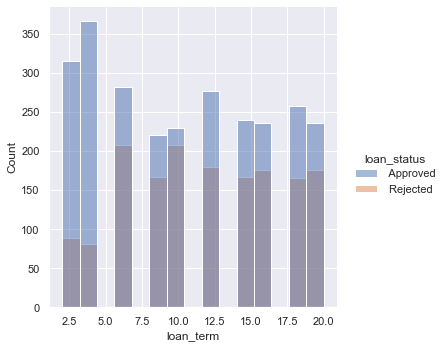

In [25]:
sns.displot(data = df , x ="loan_term",hue='loan_status')

***Note the short loan terms are more approved than long terms ***

### Outliers

In [26]:
from scipy import stats

In [27]:

def detect_outliers_iqr(df, columns):
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)].any(axis=1)
  return outliers

In [28]:
# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df, ['loan_term','income_annum','residential_assets_value','luxury_assets_value','bank_asset_value'])
print("Outliers using IQR:\n", outliers_iqr.sum())


Outliers using IQR:
 57


# Data Pre-Processing

In [29]:
df.loan_term.describe()

count    4269.000000
mean       10.900445
std         5.709187
min         2.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        20.000000
Name: loan_term, dtype: float64

In [30]:
df.loan_term = df.loan_term * 365

In [31]:
df.loan_term.describe()

count    4269.000000
mean     3978.662450
std      2083.853357
min       730.000000
25%      2190.000000
50%      3650.000000
75%      5840.000000
max      7300.000000
Name: loan_term, dtype: float64

In [32]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [33]:
categorical_features = ['education', 'self_employed', 'loan_status']

In [34]:
cat_df = df[categorical_features]

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler


## Encoding

In [41]:
from sklearn.preprocessing import OneHotEncoder

def encode_features(df, categorical_features):
    # One-hot encoding for nominal features
    encoder = OneHotEncoder(sparse=False)
    encoded_data = encoder.fit_transform(df)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(categorical_features))
    return encoded_df

encoded_df = encode_features(cat_df, categorical_features)
encoded_df


,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
4264,1.0,0.0,0.0,1.0,0.0,1.0
4265,0.0,1.0,0.0,1.0,1.0,0.0
4266,0.0,1.0,1.0,0.0,0.0,1.0
4267,0.0,1.0,1.0,0.0,1.0,0.0


In [42]:
encoded_df.columns

Index(['education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected'],
      dtype='object')

In [43]:
encoded_df = encoded_df[['education_ Graduate', 'self_employed_ Yes', 'loan_status_ Approved' ]]

In [45]:
# Assuming this is the correct method from your previous code
encoded_df = encode_features(cat_df, categorical_features)

# Check the columns of encoded_df to ensure they match what you're trying to assign
print(encoded_df.columns)

# Assign encoded columns back to the original DataFrame
df_encode = df.copy()  # It's better to use .copy() to avoid modifying the original df directly
df_encode[['education', 'self_employed', 'loan_status']] = encoded_df[['education_ Graduate', 'self_employed_ Yes', 'loan_status_ Approved']]


Index(['education_ Graduate', 'education_ Not Graduate', 'self_employed_ No',
       'self_employed_ Yes', 'loan_status_ Approved', 'loan_status_ Rejected'],
      dtype='object')


In [46]:
df_encode.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x = df_encode.drop('loan_status', axis=1)
y = df_encode['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=79, stratify=y)

In [48]:
numerical_features = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score','residential_assets_value', 'commercial_assets_value', 'bank_asset_value', 'luxury_assets_value']
xtrain_num = x_train[numerical_features]
xtest_num = x_test[numerical_features]

In [49]:
xtrain_num

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,luxury_assets_value
451,500000,900000,6570,618,1400000,600000,400000,1200000
1464,4400000,17300000,7300,840,3600000,5100000,2300000,12900000
2699,5500000,14800000,3650,354,16000000,3400000,7700000,21200000
462,4400000,14700000,5840,638,4000000,2700000,2700000,14400000
1348,9400000,20000000,1460,350,3300000,1400000,4700000,37200000
...,...,...,...,...,...,...,...,...
1412,6900000,21400000,3650,577,12500000,2200000,6300000,14900000
256,9800000,35400000,2190,869,14400000,16400000,10300000,22800000
4133,3000000,8800000,5110,402,5600000,5300000,4200000,8600000
1424,8500000,25400000,1460,336,8500000,1200000,9000000,30600000


## Scaling Data

# **Model Selection**

In [52]:
import joblib
scaler = RobustScaler(quantile_range=(20, 80))
scaler.fit(xtrain_num)
train_feats_scaled = pd.DataFrame(scaler.transform(xtrain_num),columns=xtrain_num.columns)
test_feats_scaled = pd.DataFrame(scaler.transform(xtest_num),columns=xtest_num.columns)

In [53]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [54]:
train_feats_scaled

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,luxury_assets_value
0,-0.790378,-0.805134,0.666667,0.053672,-0.368421,-0.397436,-0.709459,-0.779446
1,-0.120275,0.151692,0.833333,0.680791,-0.175439,0.179487,-0.388514,-0.103926
2,0.068729,0.005834,0.000000,-0.692090,0.912281,-0.038462,0.523649,0.375289
3,-0.120275,0.000000,0.500000,0.110169,-0.140351,-0.128205,-0.320946,-0.017321
4,0.738832,0.309218,-0.500000,-0.703390,-0.201754,-0.294872,0.016892,1.299076
...,...,...,...,...,...,...,...,...
3410,0.309278,0.390898,0.000000,-0.062147,0.605263,-0.192308,0.287162,0.011547
3411,0.807560,1.207701,-0.333333,0.762712,0.771930,1.628205,0.962838,0.467667
3412,-0.360825,-0.344224,0.333333,-0.556497,0.000000,0.205128,-0.067568,-0.352194
3413,0.584192,0.624271,-0.500000,-0.742938,0.254386,-0.320513,0.743243,0.918014


In [55]:
x_train.drop(numerical_features, axis=1, inplace=True)
x_test.drop(numerical_features, axis=1, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
x_train.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
dtype: int64

In [57]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [58]:
train_feats_scaled.shape

(3415, 8)

In [59]:
x_train_new = pd.concat([x_train, train_feats_scaled], axis=1)
x_test_new = pd.concat([x_test, test_feats_scaled], axis=1)

In [60]:
x_train_new

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,luxury_assets_value
0,5,1.0,1.0,-0.790378,-0.805134,0.666667,0.053672,-0.368421,-0.397436,-0.709459,-0.779446
1,5,1.0,1.0,-0.120275,0.151692,0.833333,0.680791,-0.175439,0.179487,-0.388514,-0.103926
2,4,1.0,1.0,0.068729,0.005834,0.000000,-0.692090,0.912281,-0.038462,0.523649,0.375289
3,0,1.0,0.0,-0.120275,0.000000,0.500000,0.110169,-0.140351,-0.128205,-0.320946,-0.017321
4,0,1.0,1.0,0.738832,0.309218,-0.500000,-0.703390,-0.201754,-0.294872,0.016892,1.299076
...,...,...,...,...,...,...,...,...,...,...,...
3410,4,1.0,1.0,0.309278,0.390898,0.000000,-0.062147,0.605263,-0.192308,0.287162,0.011547
3411,3,1.0,1.0,0.807560,1.207701,-0.333333,0.762712,0.771930,1.628205,0.962838,0.467667
3412,5,1.0,1.0,-0.360825,-0.344224,0.333333,-0.556497,0.000000,0.205128,-0.067568,-0.352194
3413,5,1.0,0.0,0.584192,0.624271,-0.500000,-0.742938,0.254386,-0.320513,0.743243,0.918014


In [61]:
x_test_new

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,luxury_assets_value
0,2,1.0,1.0,0.103093,0.017503,0.833333,-0.612994,0.666667,0.256410,0.236486,-0.167436
1,1,0.0,1.0,0.034364,0.245041,0.500000,-0.672316,-0.464912,0.166667,0.152027,-0.161663
2,5,0.0,1.0,0.738832,0.694282,0.833333,0.485876,0.403509,1.141026,1.199324,1.281755
3,4,0.0,0.0,-0.274914,-0.303384,-0.666667,0.158192,0.377193,0.371795,-0.253378,-0.306005
4,3,0.0,1.0,0.756014,0.554259,-0.166667,0.790960,-0.219298,1.730769,1.368243,0.675520
...,...,...,...,...,...,...,...,...,...,...,...
849,0,0.0,1.0,-0.429553,-0.379230,-0.166667,0.087571,0.035088,0.153846,-0.439189,-0.415704
850,5,0.0,1.0,-0.171821,-0.134189,-0.166667,-0.819209,0.228070,-0.346154,-0.219595,-0.098152
851,1,1.0,1.0,-0.274914,-0.227538,0.333333,0.093220,0.114035,-0.282051,-0.067568,-0.219400
852,3,1.0,1.0,-0.360825,-0.420070,-0.333333,0.796610,-0.368421,0.102564,-0.388514,-0.496536


In [62]:
from sklearn.model_selection import cross_validate

In [63]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [64]:
models = list()
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
models.append(("xg" , XGBClassifier()))
models.append(("GB" , GradientBoostingClassifier()))

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
from sklearn.metrics import f1_score

In [67]:
for model in models:
  print(model[0])
  model[1].fit(x_train_new, y_train)
  y_pred = model[1].predict(x_test_new)
  print(classification_report(y_test, y_pred))
  print("O" * 50)
  print('roc_auc_score ',roc_auc_score(y_test, y_pred))
  print('f1_score ',f1_score(y_test, y_pred))
  print("-" * 50)

CART
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       323
         1.0       0.99      0.99      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
roc_auc_score  0.9853976083445569
f1_score  0.9896713615023475
--------------------------------------------------
RF
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       323
         1.0       0.99      0.98      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
roc_auc_score  0.9831791176179064
f1_score  0.9867924528301886
--------------------------------------------------
xg
     

# hyperparameters tuning XGBoost

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [ 30,40,50,60],
    'min_child_weight': [0.5, 1, 5, 9],
    'gamma': [0.0, 0.5, 1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}


In [71]:
model = XGBClassifier(max_depth=7 , n_estimators=40,learning_rate=0.1,min_child_weight=.4 )

In [72]:
model.fit(x_train_new, y_train)
y_pred = model.predict(x_test_new)
print(classification_report(y_test, y_pred))
print("O" * 50)
print('roc_auc_score ',roc_auc_score(y_test, y_pred))
print('f1_score ',f1_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       323
         1.0       0.99      0.99      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
roc_auc_score  0.9909831907785416
f1_score  0.993414863593603


# Model Performance

The **confusion matrix** provides a breakdown of the model's performance:

* True Negatives (TN): **Correctly predicted rejections.**
* False Negatives (FN): Incorrectly predicted rejections (actually approved).
* False Positives (FP): Incorrectly predicted approvals (actually rejected).
* True Positives (TP): **Correctly predicted approvals.**

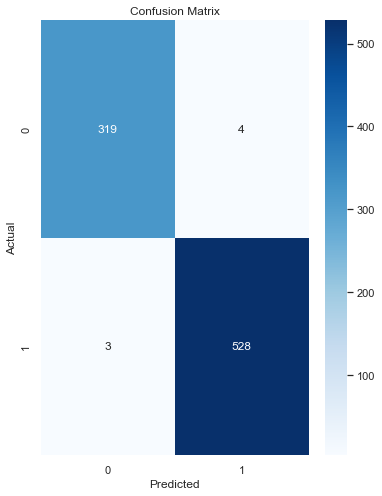

In [73]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [76]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='f1',  # Use 'f1' instead of 'f1_score'
                           cv=1,
                           return_train_score=True,
                           n_jobs=-1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       323
         1.0       0.99      0.99      0.99       531

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854

OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
roc_auc_score  0.9909831907785416
f1_score  0.993414863593603


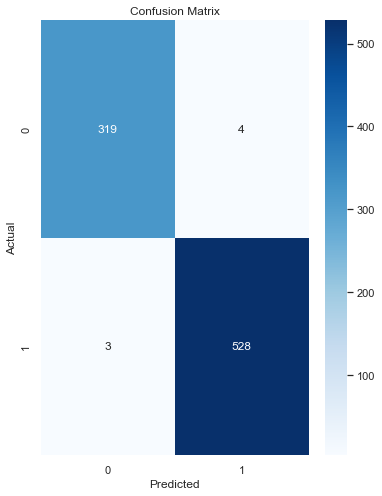

In [81]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier  # Ensure XGBClassifier is imported
from sklearn.metrics import classification_report, roc_auc_score, f1_score

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [30, 40, 50, 60],
    'min_child_weight': [0.5, 1, 5, 9],
    'gamma': [0.0, 0.5, 1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

model = XGBClassifier(max_depth=7, n_estimators=40, learning_rate=0.1, min_child_weight=0.4)
model.fit(x_train_new, y_train)
y_pred = model.predict(x_test_new)
print(classification_report(y_test, y_pred))
print("O" * 50)
print('roc_auc_score ', roc_auc_score(y_test, y_pred))
print('f1_score ', f1_score(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [82]:
# Perform GridSearchCV with proper cv value
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='f1',  # Use 'f1' instead of 'f1_score'
                           cv=5,  # Use a value greater than 1 for cross-validation
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(x_train_new, y_train)  # Ensure you use x_train_new and y_train for fitting


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=40, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                         

In [79]:

forest_importances = pd.Series(model.feature_importances_, index=x_train_new.columns)
forest_importances.sort_values(ascending=False)

cibil_score                 0.696919
loan_term                   0.226658
loan_amount                 0.019325
income_annum                0.017556
luxury_assets_value         0.008183
residential_assets_value    0.007858
bank_asset_value            0.007226
commercial_assets_value     0.006055
no_of_dependents            0.005193
self_employed               0.003012
education                   0.002014
dtype: float32

This shows that cibil_score is the highest feature impacting our model prediction